In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data file from our location
#Add the column title
#show the shape of dataset
df = pd.read_excel('D:\Project-ML\car_data1.xlsx')
df.columns = ['Buying', 'Maint', 'Doors','Persons','Lug_Boot','Safety','Evaluation']
df.shape

(1727, 7)

In [4]:
print(df)

     Buying  Maint  Doors Persons Lug_Boot Safety Evaluation
0     vhigh  vhigh      2       2    small    med      unacc
1     vhigh  vhigh      2       2    small   high      unacc
2     vhigh  vhigh      2       2      med    low      unacc
3     vhigh  vhigh      2       2      med    med      unacc
4     vhigh  vhigh      2       2      med   high      unacc
...     ...    ...    ...     ...      ...    ...        ...
1722    low    low  5more    more      med    med       good
1723    low    low  5more    more      med   high      vgood
1724    low    low  5more    more      big    low      unacc
1725    low    low  5more    more      big    med       good
1726    low    low  5more    more      big   high      vgood

[1727 rows x 7 columns]


In [5]:
#print our first 5 data instance from dataset. 
df.head()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
#decribe our dataset
df.describe()

,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Evaluation
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,med,high,unacc
freq,432,432,432,576,576,576,1209


In [7]:
#to check null or missing value
df.isna().sum()

Buying        0
Maint         0
Doors         0
Persons       0
Lug_Boot      0
Safety        0
Evaluation    0
dtype: int64

In [8]:
#count the class vise data value from dataset
df['Evaluation'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Evaluation, dtype: int64

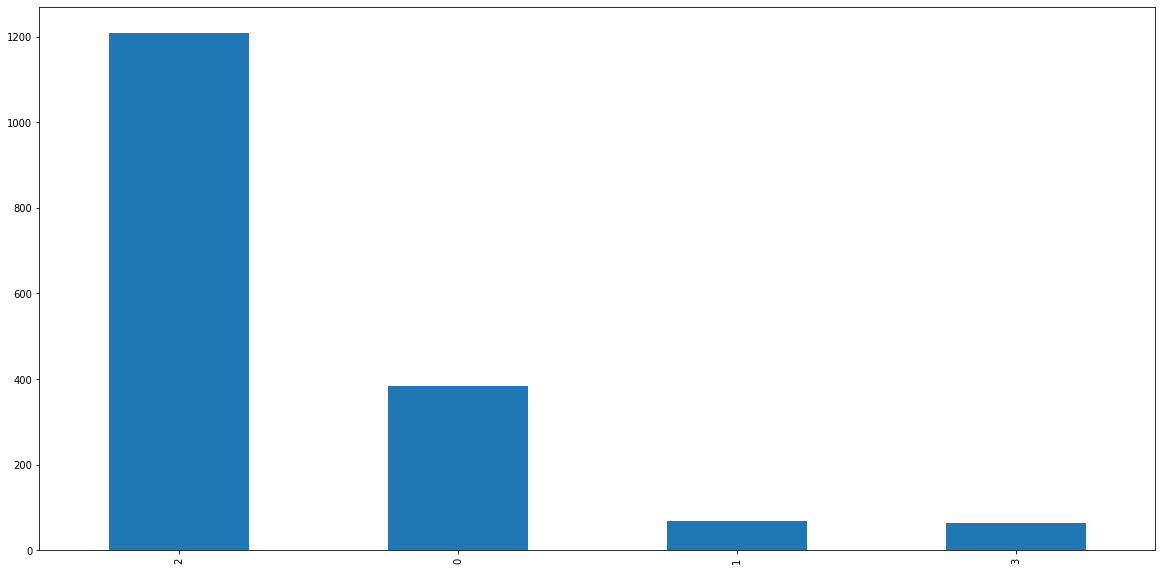

In [83]:
#Plot the bar graph for evaluation(class) instance
df['Evaluation'].value_counts().plot(kind='bar',figsize=(20,10))

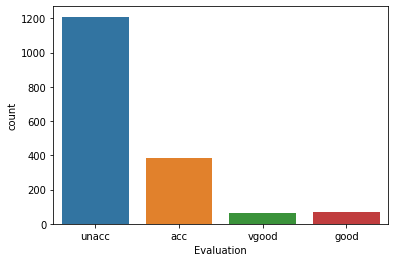

In [10]:
#used seaborn for differentiate four different class with different colors.
sns.countplot(df['Evaluation'])

In [11]:
#check data types
df.dtypes

Buying        object
Maint         object
Doors         object
Persons       object
Lug_Boot      object
Safety        object
Evaluation    object
dtype: object

In [12]:
#categorical data must be encoded to numbers

from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [79]:
print(df)

      Buying  Maint  Doors  Persons  Lug_Boot  Safety  Evaluation
0          3      3      0        0         2       2           2
1          3      3      0        0         2       0           2
2          3      3      0        0         1       1           2
3          3      3      0        0         1       2           2
4          3      3      0        0         1       0           2
...      ...    ...    ...      ...       ...     ...         ...
1722       1      1      3        2         1       2           1
1723       1      1      3        2         1       0           3
1724       1      1      3        2         0       1           2
1725       1      1      3        2         0       2           1
1726       1      1      3        2         0       0           3

[1727 rows x 7 columns]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [16]:
#describe X as features and y as class. 
x=df[df.columns[:-1]]
y=df['Evaluation']

In [18]:
print(x)

      Buying  Maint  Doors  Persons  Lug_Boot  Safety
0          3      3      0        0         2       2
1          3      3      0        0         2       0
2          3      3      0        0         1       1
3          3      3      0        0         1       2
4          3      3      0        0         1       0
...      ...    ...    ...      ...       ...     ...
1722       1      1      3        2         1       2
1723       1      1      3        2         1       0
1724       1      1      3        2         0       1
1725       1      1      3        2         0       2
1726       1      1      3        2         0       0

[1727 rows x 6 columns]


In [22]:

from sklearn.model_selection import train_test_split

In [129]:
#split dataset into test set and training set
#training data size is 1527 and testing data size is 200.
x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(x, y, test_size=0.12, random_state=50)
# training size is 1600 and test size is 127 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.073, random_state=50)

In [89]:
#create classifier and Train the model 
rfc=RandomForestClassifier(criterion = 'entropy',random_state=50)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [90]:
#predict the value 
y_pred=rfc.predict(x_test)

In [91]:
#create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  1  0  0]
 [ 0  4  0  0]
 [ 3  0 86  0]
 [ 0  0  0  5]]


In [92]:
rfc.score(x_test, y_test)

0.968503937007874

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00         5

    accuracy                           0.99       127
   macro avg       0.95      0.99      0.97       127
weighted avg       0.99      0.99      0.99       127



In [130]:
#2
#training data size is 1527 and testing data size is 200.
x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(x, y, test_size=0.12, random_state=50)
# training size is 500 and test size is 200 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=30)

In [131]:
#create classifier and Train the model 
rfc=RandomForestClassifier(criterion = 'entropy',random_state=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [132]:
#predict the value 
y_pred=rfc.predict(x_test_200)

In [133]:
#create confusion matrix
cm = confusion_matrix(y_test_200, y_pred)
print(cm)

[[ 45   0   5   0]
 [  1   6   0   0]
 [ 10   0 133   0]
 [  1   0   0   7]]


In [136]:
rfc.score(x_test_200, y_test_200)

0.9182692307692307

In [137]:
print(classification_report(y_test_200,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        50
           1       1.00      0.86      0.92         7
           2       0.96      0.93      0.95       143
           3       1.00      0.88      0.93         8

    accuracy                           0.92       208
   macro avg       0.94      0.89      0.91       208
weighted avg       0.92      0.92      0.92       208



In [138]:
#3

#training data size is 1527 and testing data size is 200.
x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(x, y, test_size=0.12, random_state=50)
# training size is 750 and test size is 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.56, random_state=30)

In [139]:
#create classifier and Train the model 
rfc=RandomForestClassifier(criterion = 'entropy',random_state=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [141]:
#predict the value 
y_pred=rfc.predict(x_test_200)

In [142]:
#create confusion matrix
cm = confusion_matrix(y_test_200, y_pred)
print(cm)

[[ 47   0   3   0]
 [  0   7   0   0]
 [  5   0 138   0]
 [  1   0   0   7]]


In [145]:
rfc.score(x_test_200, y_test_200)

0.9567307692307693

In [146]:
print(classification_report(y_test_200,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        50
           1       1.00      1.00      1.00         7
           2       0.98      0.97      0.97       143
           3       1.00      0.88      0.93         8

    accuracy                           0.96       208
   macro avg       0.97      0.95      0.95       208
weighted avg       0.96      0.96      0.96       208



In [147]:
#4
#training data size is 1527 and testing data size is 200.
x_train_200, x_test_200, y_train_200, y_test_200 = train_test_split(x, y, test_size=0.12, random_state=50)
# training size is  and test size 200
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27, random_state=30)

In [148]:
#create classifier and Train the model 
rfc=RandomForestClassifier(criterion = 'entropy',random_state=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [149]:
#predict the value 
y_pred=rfc.predict(x_test_200)

In [150]:
#create confusion matrix
cm = confusion_matrix(y_test_200, y_pred)
print(cm)

[[ 50   0   0   0]
 [  0   7   0   0]
 [  4   0 139   0]
 [  0   0   0   8]]


In [151]:
rfc.score(x_test_200, y_test_200)

0.9807692307692307

In [152]:
print(classification_report(y_test_200,y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       1.00      1.00      1.00         7
           2       1.00      0.97      0.99       143
           3       1.00      1.00      1.00         8

    accuracy                           0.98       208
   macro avg       0.98      0.99      0.99       208
weighted avg       0.98      0.98      0.98       208

